# Technical Analysis API for Idle Trading Hero

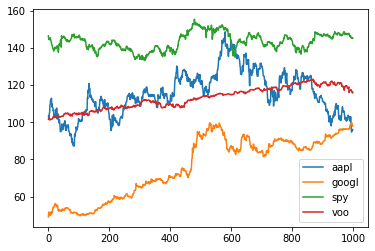

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df_aapl = pd.read_json('data/data3/AAPL-20000103-20200525.json')
df_googl = pd.read_json('data/data3/GOOGL-20040819-20200525.json')
df_spy = pd.read_json('data/data3/SPY-20000103-20200525.json')
df_voo = pd.read_json('data/data3/VOO-20100909-20200525.json')

plt.plot(df_aapl['c'][:1000], label='aapl')
plt.plot(df_googl['c'][:1000], label='googl')
plt.plot(df_spy['c'][:1000], label='spy')
plt.plot(df_voo['c'][:1000], label='voo')
plt.legend(loc='best')
plt.show()

In [2]:
df_aapl

,c,h,l,o,t,v
0,103.25000,104.0000,102.7500,102.7500,946904400,7100
1,103.46875,105.3750,103.0000,103.5000,946908000,790200
2,102.06250,106.0000,101.6875,103.4375,946911600,733400
3,104.87500,105.0000,102.0000,102.1250,946915200,373300
4,105.25000,105.4375,103.6250,104.0000,946918800,383100
...,...,...,...,...,...,...
71229,318.89000,319.2300,317.2500,318.1968,1590174000,3183051
71230,319.15020,319.2500,318.7300,318.8900,1590177600,987560
71231,319.05000,319.2000,319.0500,319.1500,1590181200,9918
71232,319.00000,319.1099,318.9000,319.0200,1590184800,11927


In [16]:
df_aapl.values[:k,:].T.tolist()

(71234, 6)

# Moving Average Convergence/Divergence (MACD) Oscillator

MACD is a trend-following momentum indicator that indicates crossovers and divergences. MACD crossing over its signal indicates buy while MACD crossing below its signal indicates sell.

Ref: https://www.investopedia.com/terms/m/macd.asp

In [3]:
from algorithms import Algorithm, MACDStrategy

In [4]:
macd = MACDStrategy(parameters={
                        'ema26': 26,
                        'ema12': 12,
                        'ema9': 9,
                    })
algo = Algorithm(indicator=df_aapl.loc[:9999],
                 strategy=macd,
                 capital=1000)

C:\Users\notes\Anaconda3\envs\quant\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'v': 391849.0, 't': 1069171200.0, 'o': 21.07, 'l': 21.01, 'c': 21.18, 'action': 0.0, 'balance_change': -0.0, 'stock': 1.0, 'balance': 1111.6764249999999, 'return': 111.67642499999988, 'alpha': 0.11167642499999988, 'sharpe': 1.4802154677034591, 'annual_sharpe': 23.49769208600708, 'sortino': 2.6020452344668903}


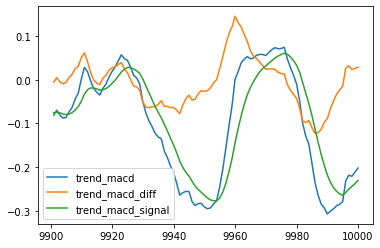

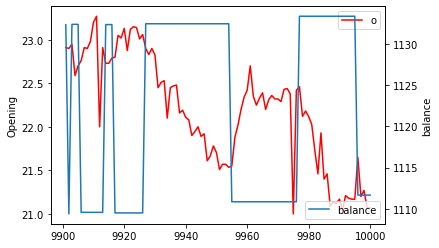

In [5]:
algo.act(df_aapl.loc[9999])
print(algo.statistics())
algo.plot_indicators(k=100)
algo.plot_performance(k=100)

# Money Flow Index (MFI)

The MFI is a technical oscillator that uses price and volume to identify overbought or oversold signals, and moves between 0 and 100.
A MFI above 80 is considered overbought and signals buy while a MFI below 20 is considered oversold and signals sell.

Ref: https://www.investopedia.com/terms/m/mfi.asp

In [12]:
from algorithms import Algorithm, MFIStrategy

mfi = MFIStrategy(parameters={
                    'mfi80': 80,
                    'mfi20': 20,
                    })
algo = Algorithm(indicator=df_aapl.loc[:],
                 strategy=mfi,
                 capital=1000)

{'v': 8945.0, 't': 1590188400.0, 'o': 318.93, 'l': 318.89, 'c': 319.06, 'action': 0.0, 'balance_change': 0.0, 'stock': -89.0, 'balance': 18435.780474999996, 'return': 17435.780474999996, 'alpha': 17.435780474999994, 'sharpe': 0.6265470725377839, 'annual_sharpe': 9.946126431663137, 'sortino': 3.9562487388778598}


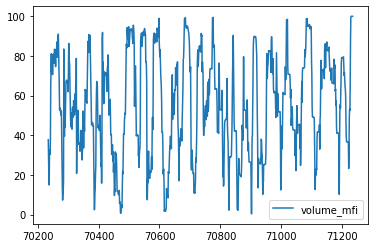

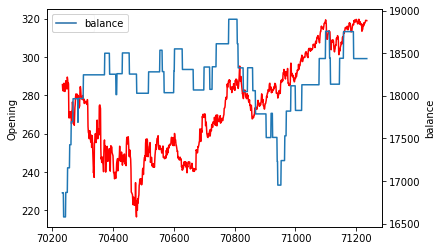

In [13]:
algo.act(df_aapl.iloc[-1])
print(algo.statistics())
algo.plot_indicators(k=1000)
algo.plot_performance(k=1000)

# Relative Strength Index (RSI)

RSI is a momentum indicator that measures magnitude of recent price changes to evaluate overbought/oversold conditions, and range from 0 to 100. RSI >= 70 indicate overbought and sell while RSI <= 30 indicate oversold and buy.

Ref: https://www.investopedia.com/terms/r/rsi.asp

In [9]:
from algorithms import Algorithm, RSIStrategy

rsi = RSIStrategy(parameters={
                    'rsi70': 70,
                    'rsi30': 30,
                    })
algo = Algorithm(indicator=df_aapl.loc[:9999],
                 strategy=rsi,
                 capital=1000)

{'v': 391849.0, 't': 1069171200.0, 'o': 21.07, 'l': 21.01, 'c': 21.18, 'action': 0.0, 'balance_change': 0.0, 'stock': -13.0, 'balance': 1154.3949, 'return': 154.3949, 'alpha': 0.1543949, 'sharpe': -0.43391164027155593, 'annual_sharpe': -6.888133746807937, 'sortino': -0.6514277659425065}


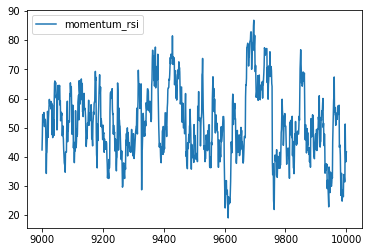

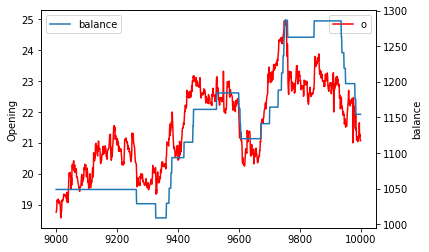

In [11]:
algo.act(df_aapl.loc[9999])
print(algo.statistics())
algo.plot_indicators(k=1000)
algo.plot_performance(k=1000)